In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
data["TotalCharges"]=data["TotalCharges"].replace(" ","0")
data["TotalCharges"]=data["TotalCharges"].astype("float")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data["customerID"].duplicated().sum()

np.int64(0)

# converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [14]:
def convertion(v):
  if v==1:
    return "Yes"
  else:
    return "No"
data["SeniorCitizen"]=data["SeniorCitizen"].apply(convertion)

In [15]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
data["SeniorCitizen"].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [ ]:
data.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

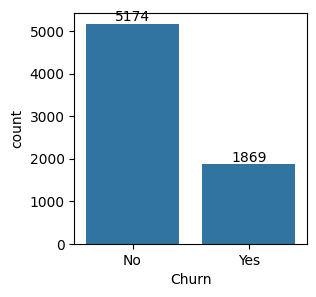

In [54]:
plt.figure(figsize = (3,3))

show=sns.countplot(x=data["Churn"])
# to show the value
show.bar_label(show.containers[0])
plt.show()

In [23]:
valueCount=data["Churn"].value_counts()
valueCount

Churn
No     5174
Yes    1869
Name: count, dtype: int64

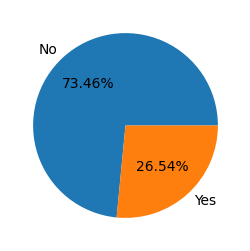

In [55]:
plt.figure(figsize = (3,3))

plt.pie(valueCount,labels=valueCount.index,autopct="%1.2f%%")
plt.show()

# from the given pie chart we can conclude that 26.54% of our customers have churned out.
# not let's explore the reason behind it

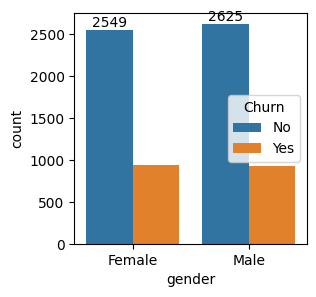

In [53]:
plt.figure(figsize = (3,3))

vale_show=sns.countplot(x=data["gender"],hue=data["Churn"])
vale_show.bar_label(vale_show.containers[0])
plt.show()

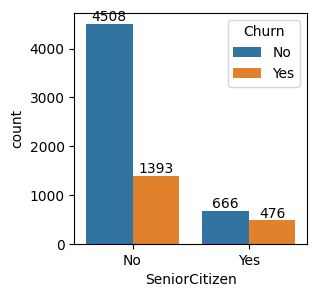

In [82]:
plt.figure(figsize = (3,3))
vale_show=sns.countplot(x=data["SeniorCitizen"],hue=data["Churn"])
vale_show.bar_label(vale_show.containers[0])
vale_show.bar_label(vale_show.containers[1])
plt.show()

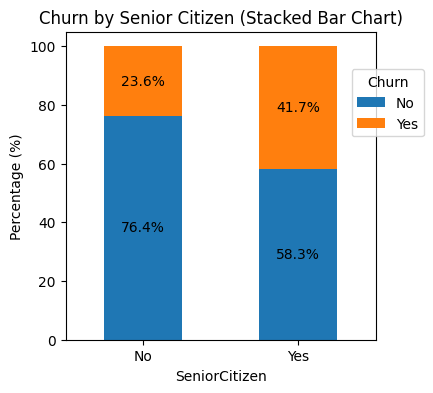

In [52]:
total_counts = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

# comparative a greater pecentage of people in senior citizen category have churned


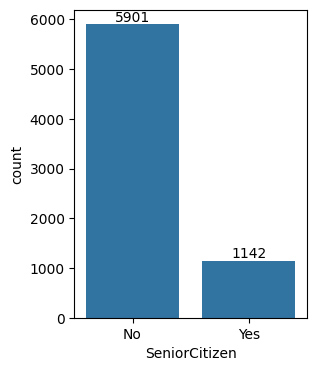

In [59]:
plt.figure(figsize = (3,4))
count_sinior=sns.countplot(x=data["SeniorCitizen"])
count_sinior.bar_label(count_sinior.containers[0])
plt.show()

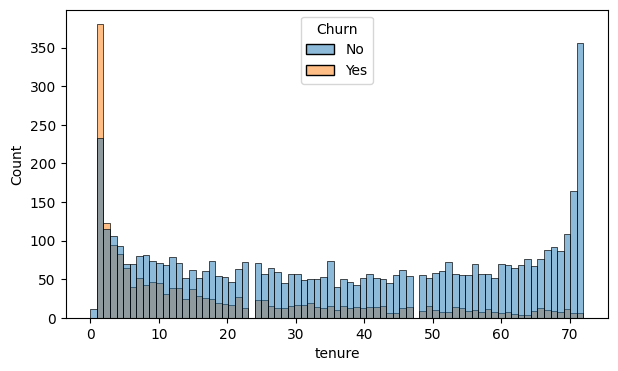

In [64]:
plt.figure(figsize = (7,4))

sns.histplot(x=data["tenure"],bins=75,hue=data["Churn"])
plt.show()

# people who have used our services for a long time have stayed and people who have used our sevices
# 1 or 2 months have churned

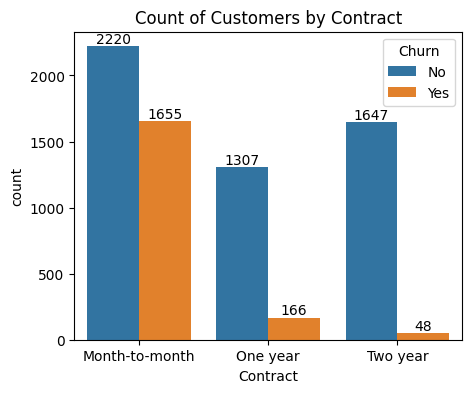

In [81]:
plt.figure(figsize = (5,4))
count_sinior=sns.countplot(x="Contract",data=data,hue="Churn")
count_sinior.bar_label(count_sinior.containers[0])
count_sinior.bar_label(count_sinior.containers[1])
plt.title("Count of Customers by Contract")

plt.show()

# people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 


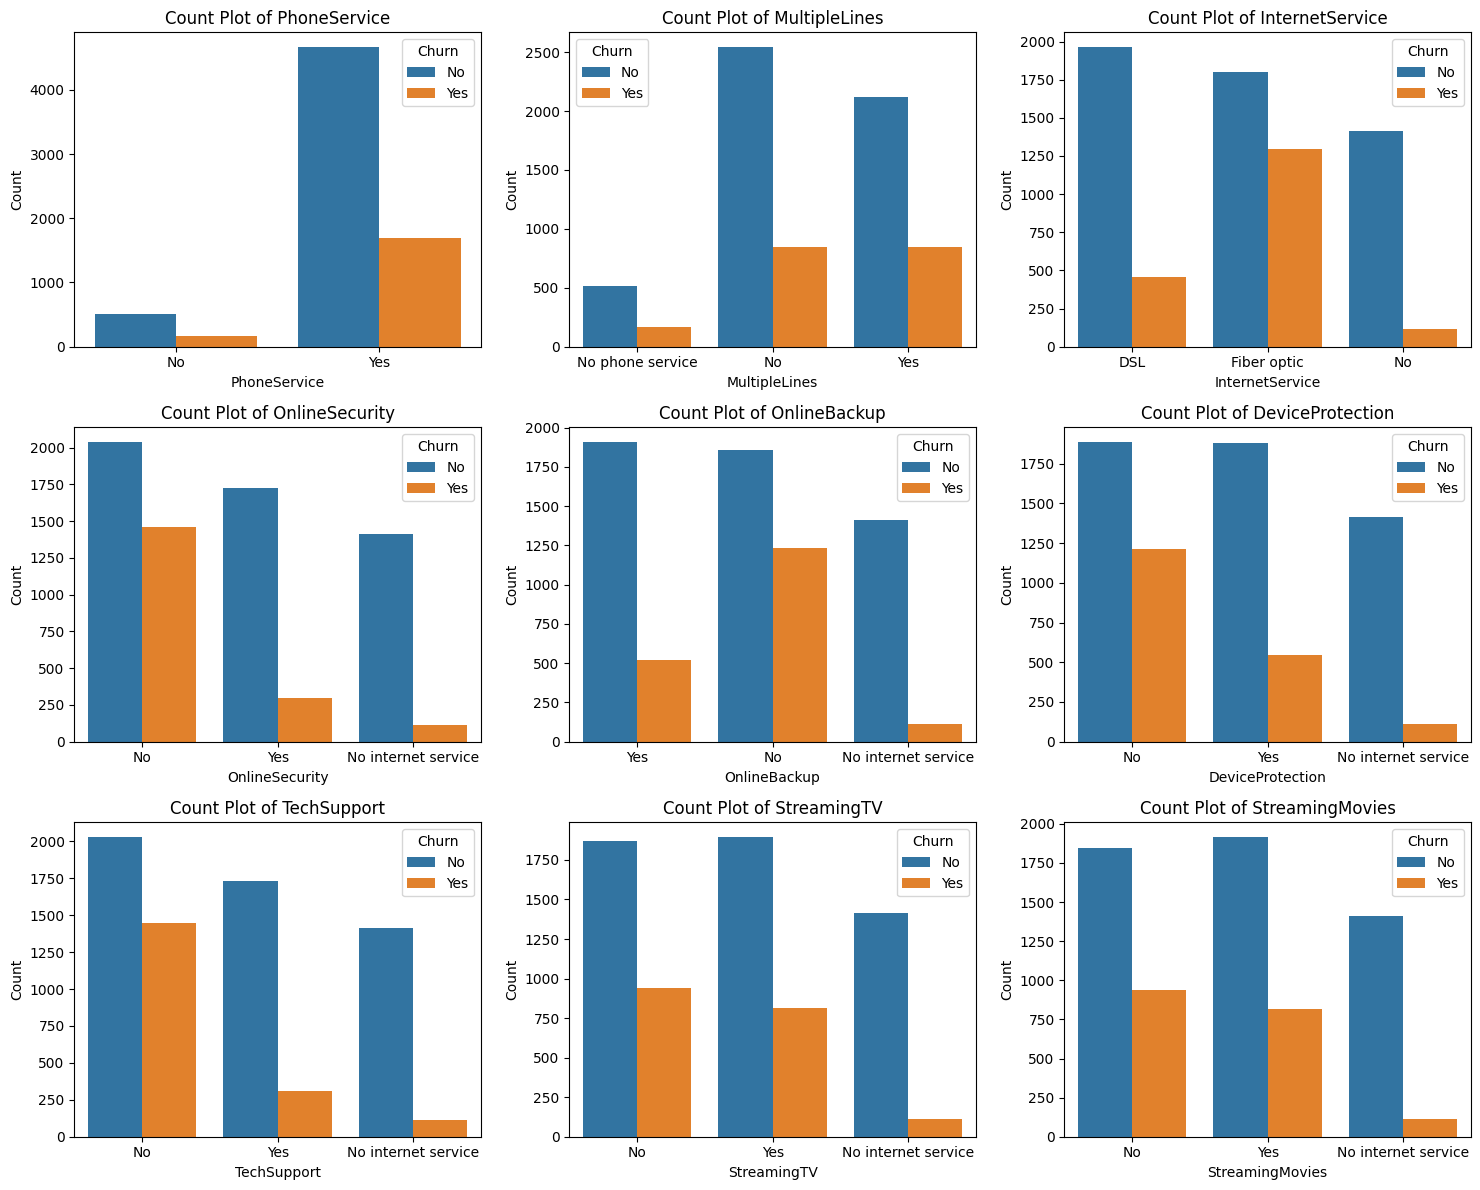

In [79]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axes[i], hue = data["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The count plots show the impact of different telecom services on customer churn. Customers who **lack online security, tech support, and device protection** have a higher likelihood of churning. **Fiber optic internet users churn more** compared to DSL users, possibly due to cost or service issues. **Customers with multiple lines and streaming services** also exhibit notable churn rates. Overall, retention seems stronger among those with additional security and support services.

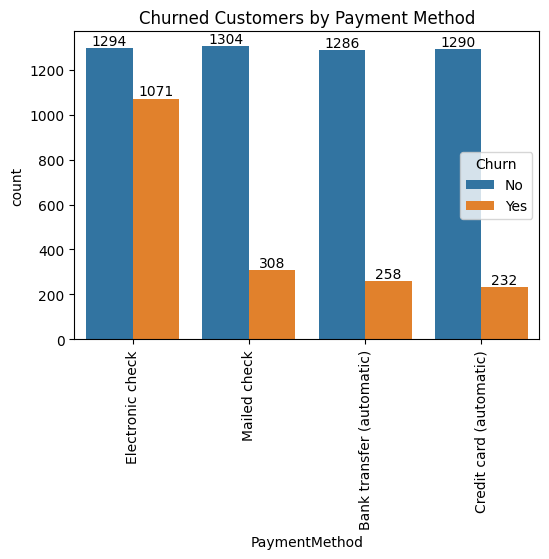

In [85]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = data, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 90)
plt.show()

# customer is likely to churn when he is using electronic check as a payment method.
